In [ ]:
# Step 1: Upload directly from your computer
from google.colab import files
uploaded = files.upload()

# After running this cell, a file-picker will appear.
# Choose your file:  Sample - Superstore.csv



Saving Sample - Superstore.csv to Sample - Superstore.csv


In [ ]:
import pandas as pd

# Replace the key below with the exact uploaded filename shown in the output box
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# See data structure
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Confirm number of rows after dropping duplicates
print("Total Rows after removing duplicates:", df.shape[0])


Total Rows after removing duplicates: 9994


In [ ]:
# Convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date']  = pd.to_datetime(df['Ship Date'])


In [ ]:
# Extract Year and Month for time-based analysis
df['Year']  = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')

# Add Profit Margin column
df['Profit Margin'] = df['Profit'] / df['Sales']

# Quick check
df[['Order Date','Sales','Profit','Profit Margin']].head()


,Order Date,Sales,Profit,Profit Margin
0,2016-11-08,261.9600,41.9136,0.1600
1,2016-11-08,731.9400,219.5820,0.3000
2,2016-06-12,14.6200,6.8714,0.4700
3,2015-10-11,957.5775,-383.0310,-0.4000
4,2015-10-11,22.3680,2.5164,0.1125


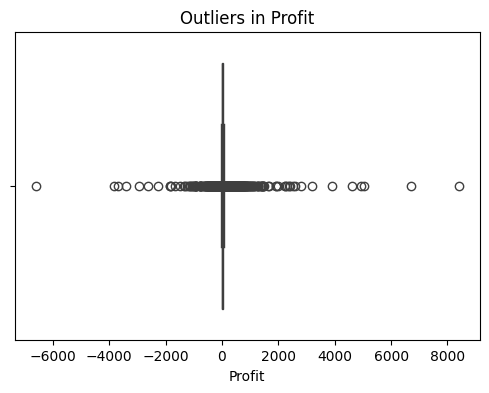

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Profit'])
plt.title("Outliers in Profit")
plt.show()


In [ ]:
# Optional: Remove outliers where Profit is extremely high or low
df = df[df['Profit'].between(df['Profit'].quantile(0.01), df['Profit'].quantile(0.99))]


In [ ]:
# Export cleaned data
df.to_csv('Clean_Superstore.csv', index=False)
print("✅ Cleaned dataset saved as 'Clean_Superstore.csv'")


✅ Cleaned dataset saved as 'Clean_Superstore.csv'


In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_margin = round(df['Profit Margin'].mean()*100, 2)
total_orders = df['Order ID'].nunique()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"📈 Total Profit: ${total_profit:,.2f}")
print(f"🏷️ Average Profit Margin: {avg_margin}%")
print(f"🧾 Total Orders: {total_orders}")


💰 Total Sales: $1,786,770.24
📈 Total Profit: $236,773.19
🏷️ Average Profit Margin: 12.87%
🧾 Total Orders: 4963


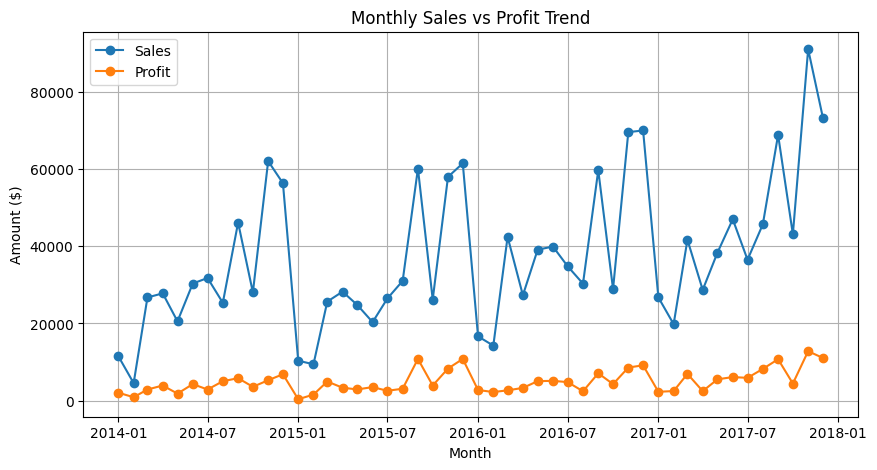

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly = df.groupby('Month')[['Sales','Profit']].sum().reset_index()
monthly['Month'] = monthly['Month'].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly['Month'], monthly['Sales'], marker='o', label='Sales')
plt.plot(monthly['Month'], monthly['Profit'], marker='o', label='Profit')
plt.title("Monthly Sales vs Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid()
plt.show()


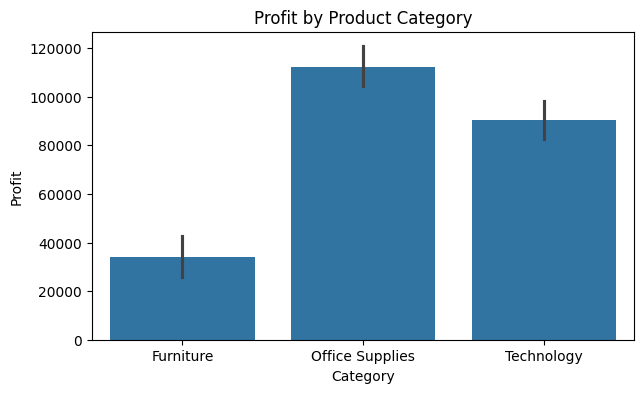

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum)
plt.title("Profit by Product Category")
plt.show()


/tmp/ipython-input-2510937880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcat.index, y=subcat.values, palette='viridis')


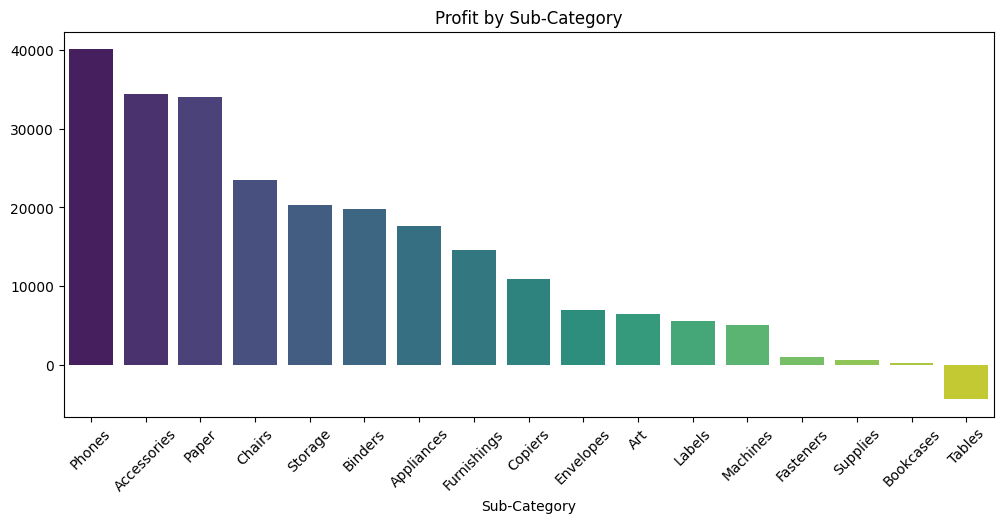

In [ ]:
subcat = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=subcat.index, y=subcat.values, palette='viridis')
plt.title("Profit by Sub-Category")
plt.xticks(rotation=45)
plt.show()


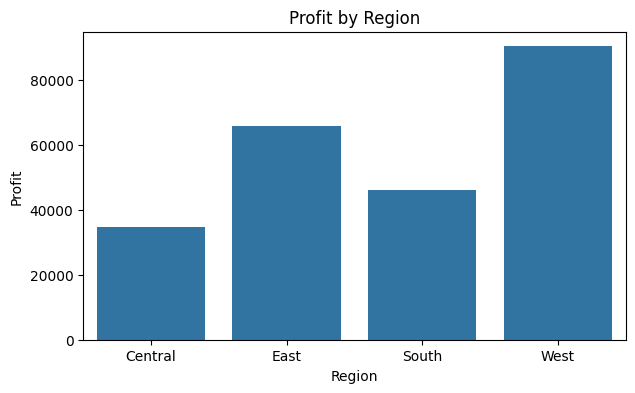

In [ ]:
region = df.groupby('Region')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(x='Region', y='Profit', data=region)
plt.title("Profit by Region")
plt.show()


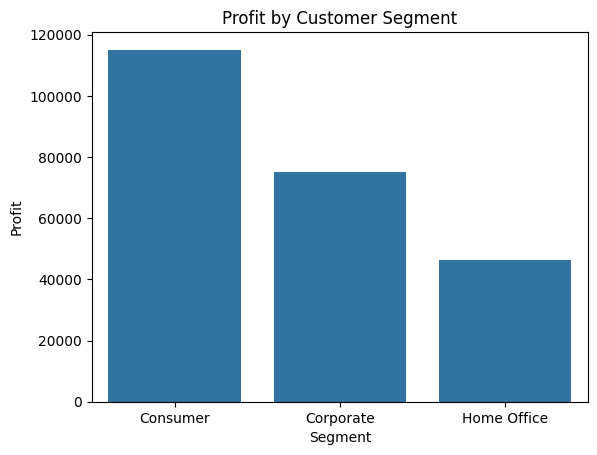

In [ ]:
segment = df.groupby('Segment')[['Sales','Profit']].sum().reset_index()
sns.barplot(x='Segment', y='Profit', data=segment)
plt.title("Profit by Customer Segment")
plt.show()


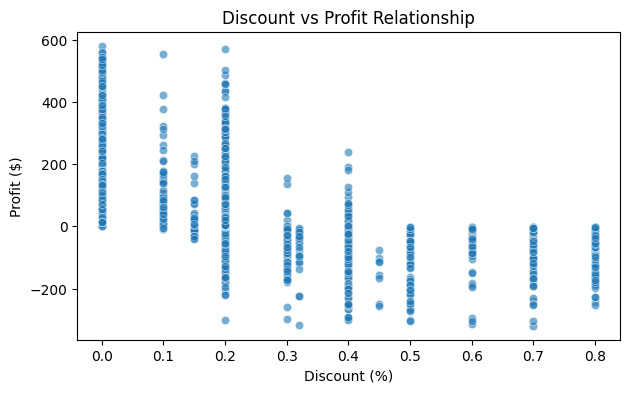

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title("Discount vs Profit Relationship")
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.show()


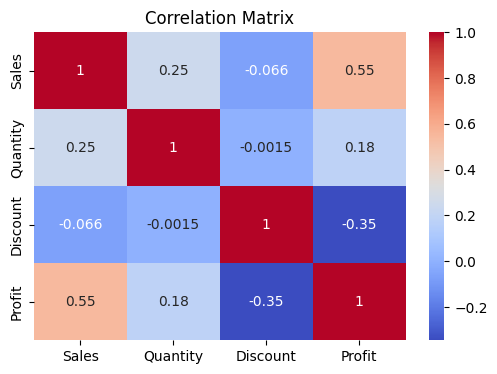

In [ ]:
corr = df[['Sales','Quantity','Discount','Profit']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
top10 = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable Sub-Categories:")
display(top10)


Top 10 Most Profitable Sub-Categories:


,Profit
Sub-Category,
Phones,40106.4361
Accessories,34439.0027
Paper,34053.5693
Chairs,23484.6492
Storage,20295.7689
Binders,19764.9493
Appliances,17606.9544
Furnishings,14570.3510
Copiers,10935.7473


In [ ]:
df.to_csv('Clean_Superstore_for_SQL_PowerBI.csv', index=False)
print("✅ File saved — ready for SQL or Power BI import!")


✅ File saved — ready for SQL or Power BI import!


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"


 BAD703-module-2-textbook.gdoc	 DA			  'JAHNAVI (R)-2-1.pdf'
 Classroom			'Getting started.pdf'	   passport.jpg
'Colab Notebooks'		 IMG-20250815-WA0003.jpg   Task2


In [ ]:
!ls "/content/drive/MyDrive/DA"


 project  'task 2'  'task 3'  'task 4'	'task 5'  'task 6'  'task 7'  'task 8'


In [ ]:
!ls "/content/drive/MyDrive/DA/project"


'DA project sql queries.sql'  'Sample - Superstore.csv (1)'
'data analyst projects.pdf'   'Sample - Superstore.csv (1).zip'


In [ ]:
!ls "/content/drive/MyDrive/DA/project/Sample - Superstore.csv (1)"



'Sample - Superstore.csv'


In [ ]:
file_path = '/content/drive/MyDrive/DA/project/Sample - Superstore.csv (1)/Sample - Superstore.csv'
df = pd.read_csv(file_path, encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# 1. Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# 2. Convert date columns to proper datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 3. Check that the conversions worked
print(df['Order Date'].dtypes, df['Ship Date'].dtypes)

# 4. Create a new Profit Margin column
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# 5. Verify final data
df.head()


datetime64[ns] datetime64[ns]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [ ]:
# Save inside Colab working directory
df.to_csv('Clean_Superstore.csv', index=False)

# Confirm it's saved
!ls


Clean_Superstore.csv  drive  sample_data


In [ ]:
from google.colab import files
files.download('Clean_Superstore.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>